Porto Seguro's Safe Driver Prediction
====

## Introduction
[This competition](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data) is hosted by the third largest insurance company in Brazil: Porto Seguro with the task of predicting the probability that a driver will initiate an insurance claim in the next year.

In the train data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. **Values of -1 indicate that the feature was missing** from the observation. The target columns signifies whether or not a claim was filed for that policy holder

train.csv contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.


In [1]:
# Import libraries
# Your code here
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read csv file and take a look at it
train = pd.read_csv('./train.csv')
train.head()


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,595212.0,743803.558435,429367.820429,7.000000,371991.500000,743547.500000,1.115549e+06,1.488027e+06
target,595212.0,0.036448,0.187401,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
ps_ind_01,595212.0,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000e+00,7.000000e+00
ps_ind_02_cat,595212.0,1.358943,0.664594,-1.000000,1.000000,1.000000,2.000000e+00,4.000000e+00
ps_ind_03,595212.0,4.423318,2.699902,0.000000,2.000000,4.000000,6.000000e+00,1.100000e+01
ps_ind_04_cat,595212.0,0.416794,0.493311,-1.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_05_cat,595212.0,0.405188,1.350642,-1.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
ps_ind_06_bin,595212.0,0.393742,0.488579,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_07_bin,595212.0,0.257033,0.436998,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_08_bin,595212.0,0.163921,0.370205,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00


In [5]:
train['target'].sample(10)

455243    0
407168    0
587700    0
495599    0
447040    0
477581    0
310753    0
111926    0
398026    0
417027    0
Name: target, dtype: int64

In [6]:
# Taking a look at how many rows and columns the train dataset contains
rows = train.shape[0]
columns = train.shape[1]
print("The train dataset contains {} rows and {} columns".format(rows, columns))

The train dataset contains 595212 rows and 59 columns


## 1. Data Quality Checks

### Null or missing values check
Let check whether there are any null values in the train dataset as follows:

In [7]:
train.isnull().values.any()

False

**Note:** Our null values check returns False but however, this does not really mean that this case has been closed as the data is also described as *"Values of -1 indicate that the feature was missing from the observation"*. Therefore I take it that Porto Seguro has simply conducted a blanket replacement of all null values in the data with the value of -1. Let us now inspect if there where any missing values in the data.

Here we can see that which columns contained -1 in their values so we could easily for example make a blanket replacement of all -1 with nulls first as follows:

In [8]:
train_copy = train.copy()
train_copy = train_copy.replace(-1, np.NaN)

We can use "Missingno" to visualize missing values in the dataset.

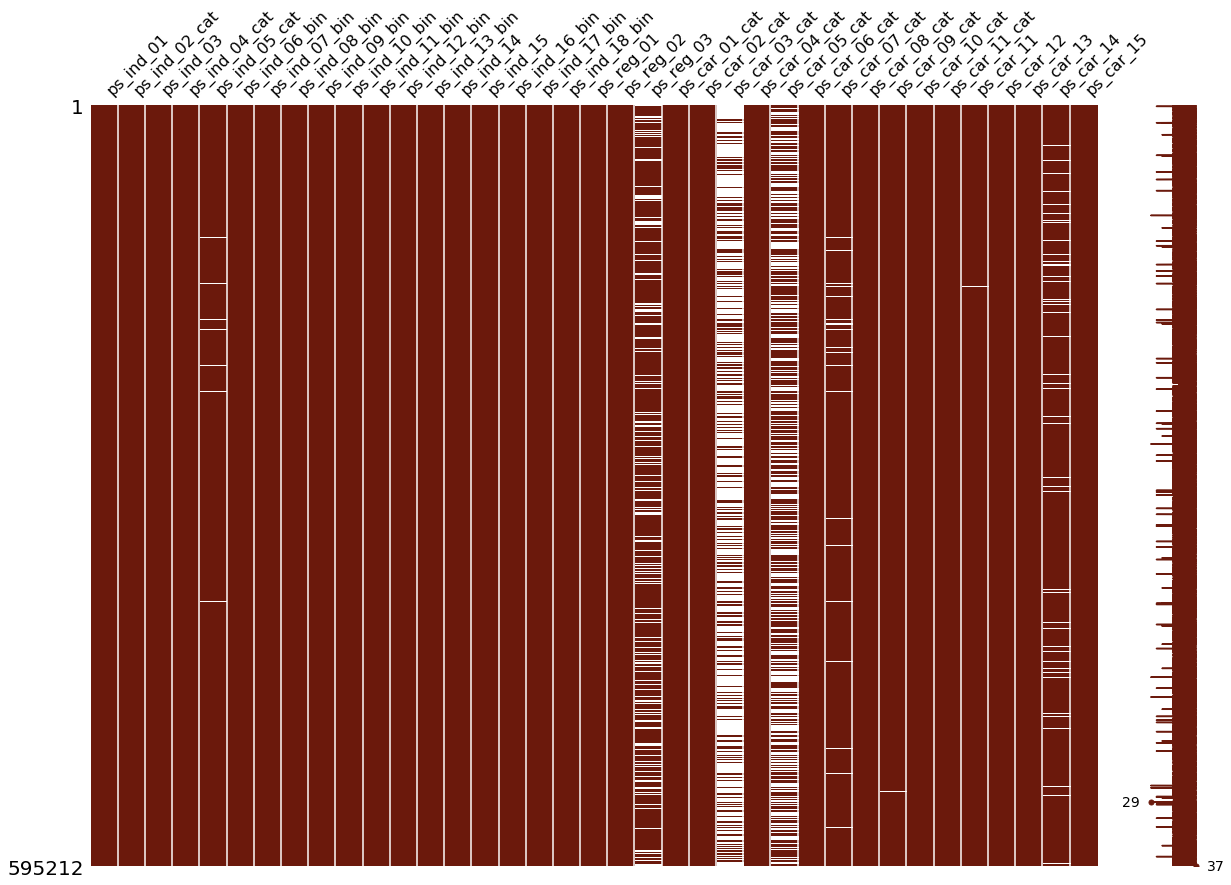

In [9]:
# If you don't have "Missingno" package, use this command to install
#conda install -c conda-forge/label/gcc7 missingno 
import missingno as msno

msno.matrix(df=train_copy.iloc[:, 2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

In [10]:
# List null columns name
# Hint: isnull()
# Your code here
train_copy.isnull().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


#### Target variable inspection

Percentage of claim:  3.6447517859182947
Percentage of claim:  96.3552482140817


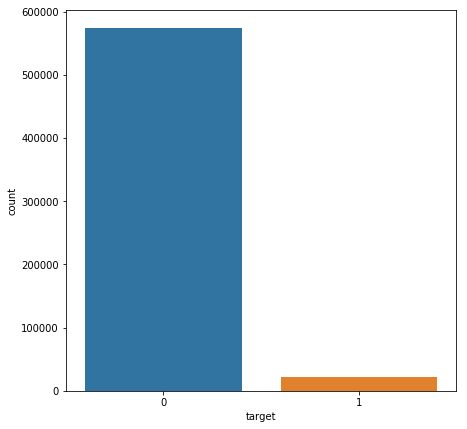

In [11]:
# Using countplot to represent target
# Your code here
plt.figure(figsize = [7,7])
sns.countplot('target',data = train)
print('Percentage of claim: ', ((train[train['target']==1].shape[0])/(train['target'].shape[0]))*100)
print('Percentage of claim: ', ((train[train['target']==0].shape[0])/(train['target'].shape[0]))*100)

## 2. Feature inspection and filtering

### Correlation plots
As a starter, let us generate some linear correlation plots just to have a quick look at how a feature is linearly correlated to the next and perhaps start gaining some insights from here. At this juncture, I will use the seaborn statistical visualisation package to plot a heatmap of the correlation values. Conveniently, Pandas dataframes come with the corr() method inbuilt, which calculates the Pearson correlation. Also as convenient is Seaborn's way of invoking a correlation plot. Just literally the word "heatmap"

#### Correlation of float features

In [12]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

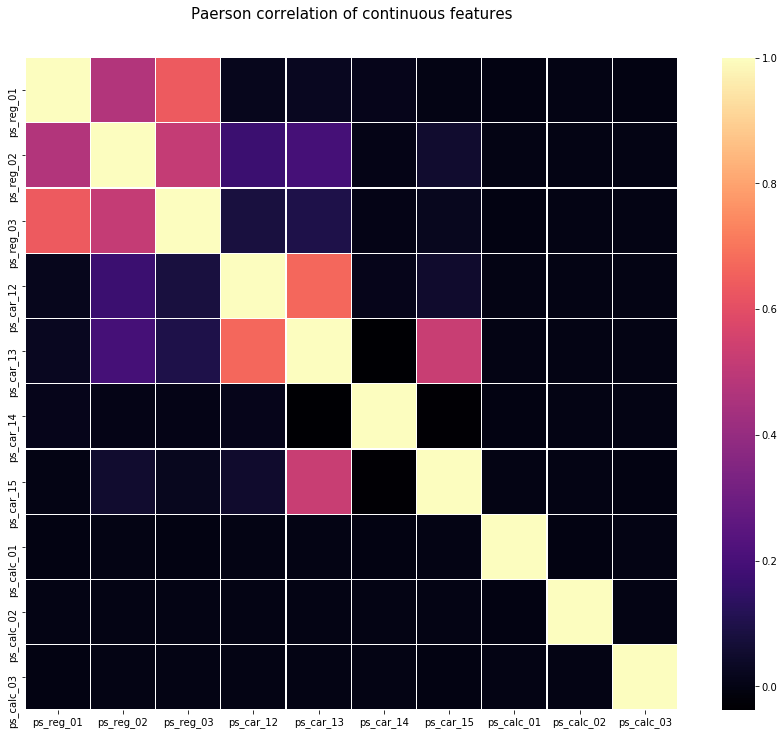

In [13]:
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title("Paerson correlation of continuous features", y=1.05, size=15)
sns.heatmap(train_float.corr(), linewidths=0.1, vmax=1.0, square=True,
           cmap=colormap)
plt.show()

From the correlation plot, we can see that the majority of the features display zero or no correlation to one another. This is quite an interesting observation that will warrant our further investigation later down. For now, the paired features that display a positive linear correlation are listed as follows:

(ps_reg_01, ps_reg_03)

(ps_reg_02, ps_reg_03)

(ps_car_12, ps_car_13)

(ps_car_13, ps_car_15)

### Correlation of integer features

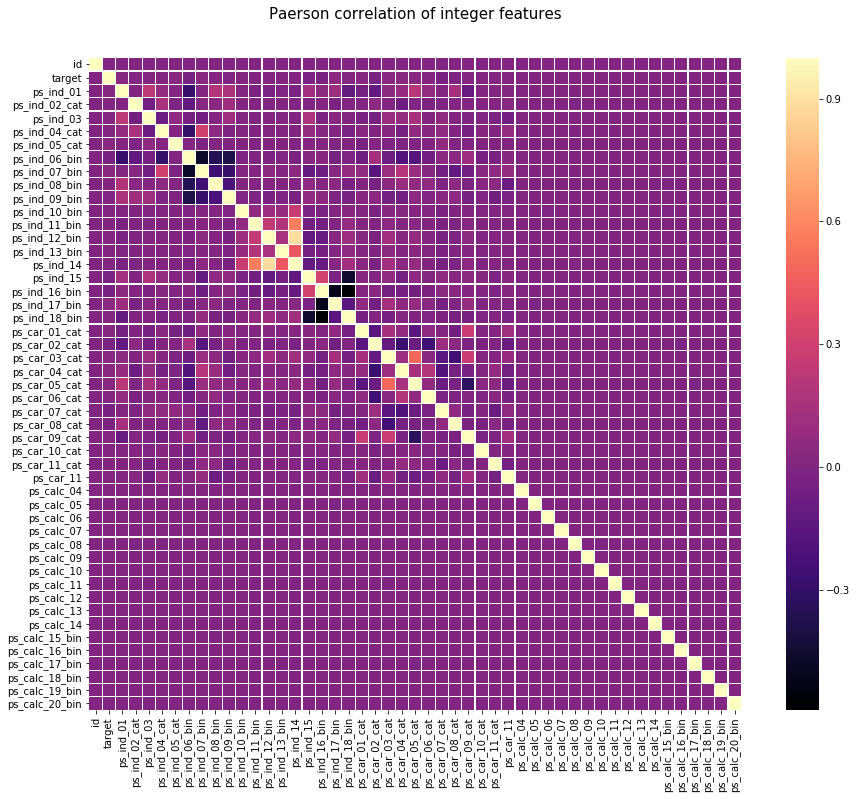

In [14]:
# Your code here
# Hint: correlation of train_int
plt.figure(figsize = [16,12])
plt.title("Paerson correlation of integer features", y=1.05, size=15)
sns.heatmap(train_int.corr(), linewidths=0.1, vmax=1.0, square=True,
           cmap=colormap)
plt.show()

In [33]:
#Can we find negatively correlation using < = operator?
negatively_corr = train_int.corr()<0
print(negatively_corr.columns.values)
# Seem like every columns have somewhat negative corr so it will return all columns
#--> We have to manually classify the negative correlation features

['id' 'target' 'ps_ind_01' 'ps_ind_02_cat' 'ps_ind_03' 'ps_ind_04_cat'
 'ps_ind_05_cat' 'ps_ind_06_bin' 'ps_ind_07_bin' 'ps_ind_08_bin'
 'ps_ind_09_bin' 'ps_ind_10_bin' 'ps_ind_11_bin' 'ps_ind_12_bin'
 'ps_ind_13_bin' 'ps_ind_14' 'ps_ind_15' 'ps_ind_16_bin' 'ps_ind_17_bin'
 'ps_ind_18_bin' 'ps_car_01_cat' 'ps_car_02_cat' 'ps_car_03_cat'
 'ps_car_04_cat' 'ps_car_05_cat' 'ps_car_06_cat' 'ps_car_07_cat'
 'ps_car_08_cat' 'ps_car_09_cat' 'ps_car_10_cat' 'ps_car_11_cat'
 'ps_car_11' 'ps_calc_04' 'ps_calc_05' 'ps_calc_06' 'ps_calc_07'
 'ps_calc_08' 'ps_calc_09' 'ps_calc_10' 'ps_calc_11' 'ps_calc_12'
 'ps_calc_13' 'ps_calc_14' 'ps_calc_15_bin' 'ps_calc_16_bin'
 'ps_calc_17_bin' 'ps_calc_18_bin' 'ps_calc_19_bin' 'ps_calc_20_bin']


#### Which features have negatively correlation?
Negatively correlated features : ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin,  ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin.

### Binary features inspection
Another aspect of the data that we may want to inspect would be the coulmns that only contain binary valeus, i.e where values take on only either of the two values 1 or 0. Proceeding, we store all columns that contain these binary values and then generate a vertical plotly bar plot of these binary values as follows:

In [16]:
bin_col = list(filter(lambda x: '_bin' in x, train.columns))
bin_value_counts = train[bin_col].apply(pd.value_counts)

In [17]:
bin_value_counts

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,360852,442223,497644,484917,594990,594205,589594,594648,201882,523143,503879,522342,221514,265356,424278,387469,503955
1,234360,152989,97568,110295,222,1007,5618,564,393330,72069,91333,72870,373698,329856,170934,207743,91257


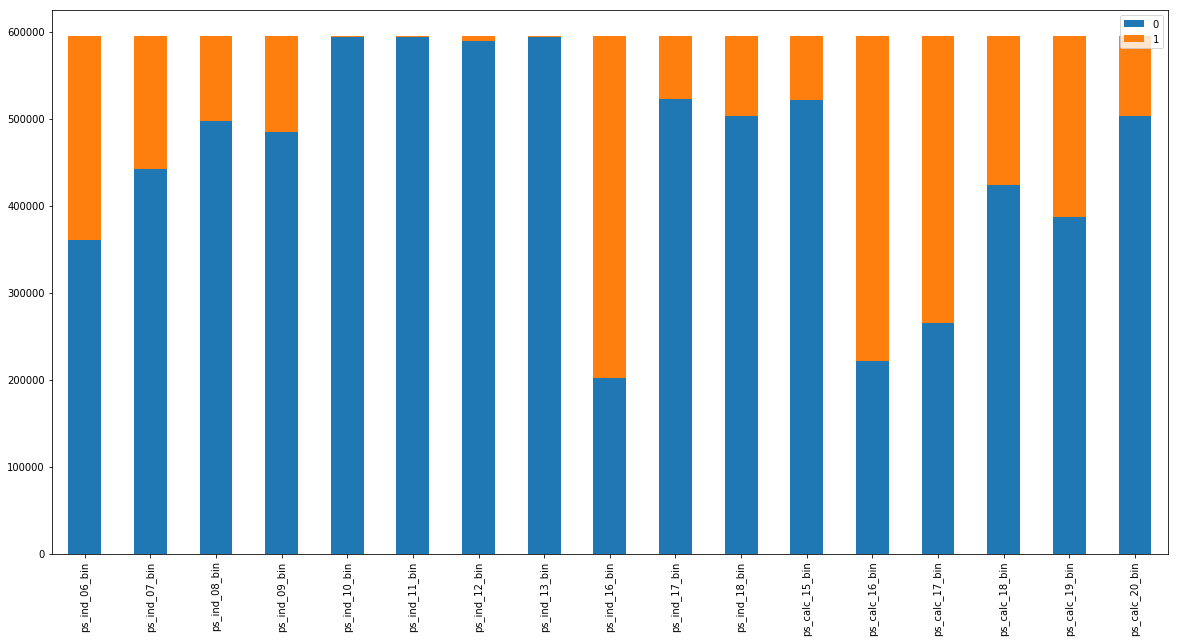

In [18]:
# hint pandas plot.bar with stacked=True
# Your code here
bin_value_counts.T.plot.bar(stacked = True,figsize = [20,10])

Those columns ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin which are completely dominated by zeros. They do not contain much information.

## 3. Preprocess Data

In [19]:
# Import train_test_split 
# Your code here
from sklearn.model_selection import train_test_split

In [36]:
# Define X (features), y (target)
X = train.drop(columns = ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin','target'])
y = train['target']

In [37]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 68)

#### Randomly Under-Sampling the Training Dataset¶
**Note:** Validate ratio between 2 class after Under-Sampling

In [70]:
#Defines training_data
training_data = pd.concat ([X_train,y_train],axis = 1)
training_data['target'].value_counts()

0    401468
1     15180
Name: target, dtype: int64

Percentage of claim:  50.0
Percentage of non-claim:  50.0
Total number of transactions in resampled data:  30360


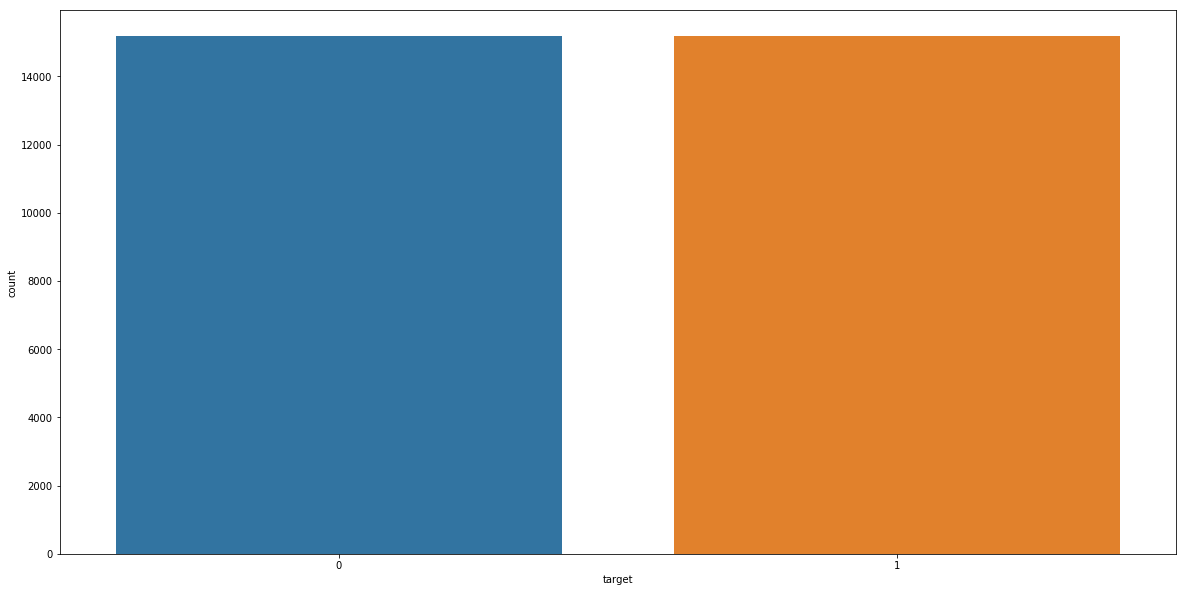

In [73]:
#Claim/non-claim data
claim_data = training_data[training_data['target']==1]
non_claim_data = training_data[training_data['target']==0]
#Number of claim/non-claim data
number_claim_data = len(claim_data)
number_non_claim_data = len(non_claim_data)
#Obtain under_sample_data:
under_sample_non_claim = non_claim_data.sample(number_claim_data)
under_sample_data = pd.concat([claim_data,under_sample_non_claim])
#Ratio
print("Percentage of claim: ", ((number_claim_data)/len(under_sample_data))*100)
print("Percentage of non-claim: ", ((len(under_sample_non_claim)/len(under_sample_data))*100))
print("Total number of transactions in resampled data: ", len(under_sample_data))
# Define X,y for under_sample_data
X_under_sample = under_sample_data.drop(columns = 'target')
y_under_sample = under_sample_data['target']
# Make a countplot to see ratio between 2 class on 'target' column in under_sample_data
plt.figure(figsize=[20,10])
sns.countplot('target',data = under_sample_data)
plt.show()

#### Randomly Over-Sampling the Training Dataset
**Note:** Validate ratio between 2 class after Over-Sampling

Percentage of claim:  50.0
Percentage of non-claim:  50.0
Total number of transactions in resampled data:  802936


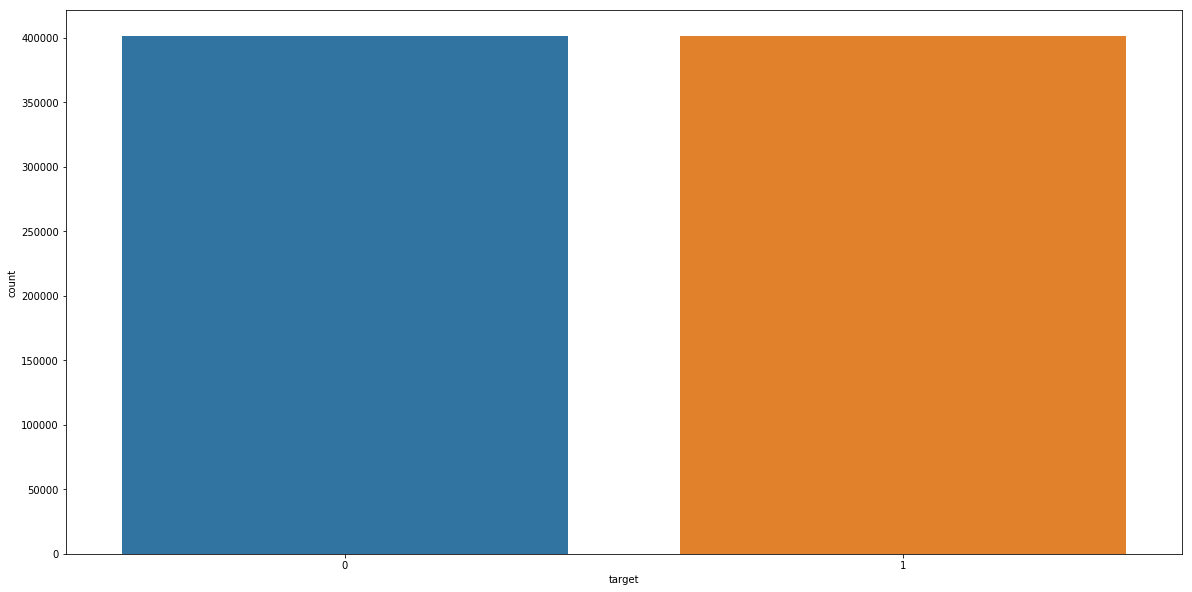

In [74]:
#Claim/non-claim data
claim_data = training_data[training_data['target']==1]
non_claim_data = training_data[training_data['target']==0]
#Number of claim/non-claim data
number_claim_data = len(claim_data)
number_non_claim_data = len(non_claim_data)
#Obtain over_sample_data:
over_sample_claim = claim_data.sample(replace = True , n = number_non_claim_data)
over_sample_data = pd.concat([over_sample_claim,non_claim_data])
#Ratio
print("Percentage of claim: ", ((len(over_sample_claim))/len(over_sample_data))*100)
print("Percentage of non-claim: ", ((number_non_claim_data/len(over_sample_data))*100))
print("Total number of transactions in resampled data: ", len(over_sample_data))
# Define X,y for under_sample_data
X_over_sample = over_sample_data.drop(columns = 'target')
y_over_sample = over_sample_data['target']
# Make a countplot to see ratio between 2 class on 'target' column in under_sample_data
plt.figure(figsize=[20,10])
sns.countplot('target',data = over_sample_data)
plt.show()

## 4. Modeling

In [24]:
# Spot check with LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, BernoulliNB, GaussianNB
# Import libraries and and create model
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
bnb = BernoulliNB()
gnb = GaussianNB()

models = [lr, dtc, rfc, gnb, bnb]
models_name = ["Logistic Regression", "Decision Tree", "Random Forest", "Bernoulli NB", "Gaussian NB"]

## 5. Evaluation Metrics

In [58]:
# Import confusion_matrix, classification_report
# Your code here
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import recall_score, precision_score

# We create an utils function, that take a trained model as argument and print out confusion matrix
# classification report base on X and y
def evaluate_model(estimator, X, y, dataframe):
    prediction = estimator.predict(X)
    print('Confusion matrix:\n', confusion_matrix(y,prediction))
    print('Classification report:\n', classification_report(y,prediction) )
    print('Testing set information:\n', y.value_counts() )
    model_name = type(estimator).__name__
    return {'name': model_name, 
            'recall': recall_score(y, prediction),
            'precision': precision_score(y, prediction),
           'dataframe': dataframe}
np.set_printoptions(precision=2)

### Evaluate with Origin dataset

In [59]:
scores_origin = []
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    model.fit(X_train,y_train)
    # Evaluate model with X_test, y_test
    scores_origin.append(evaluate_model(model,X_test,y_test,'origin'))
    print("=======================================")

Model: Logistic Regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[172050      0]
 [  6514      0]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172050
           1       0.00      0.00      0.00      6514

   micro avg       0.96      0.96      0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing set information:
 0    172050
1      6514
Name: target, dtype: int64
Model: Decision Tree
Confusion matrix:
 [[163801   8249]
 [  6108    406]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    172050
           1       0.05      0.06      0.05      6514

   micro avg       0.92      0.92      0.92    178564
   macro avg       0.51      0.51      0.51    178564
weighted avg       0.93      0.92      0.93    178564

Testing set information:
 0    172050
1      6514
Name: target, dtype: int64
Model: Random Forest
Confusion matrix:
 [[172041      9]
 [  6511      3]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172050
           1       0.25      0.00      0.00      6514

   micro avg       0.96      0.96      0.96    178564
   macro avg       0.61      0.50      0.49    178564
weighted avg       0.94      0.96      0.95    17

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix:
 [[172033     17]
 [  6509      5]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172050
           1       0.23      0.00      0.00      6514

   micro avg       0.96      0.96      0.96    178564
   macro avg       0.60      0.50      0.49    178564
weighted avg       0.94      0.96      0.95    178564

Testing set information:
 0    172050
1      6514
Name: target, dtype: int64


In [67]:
origin = pd.DataFrame(scores_origin)
origin.head()

,dataframe,name,precision,recall
0,origin,LogisticRegression,0.000000,0.000000
1,origin,DecisionTreeClassifier,0.046909,0.062327
2,origin,RandomForestClassifier,0.250000,0.000461
3,origin,GaussianNB,0.000000,0.000000
4,origin,BernoulliNB,0.227273,0.000768


### Evaluate with *Undersampled* dataset

In [75]:
scores_undersample = []
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    model.fit(X_under_sample,y_under_sample)
    scores_undersample.append(evaluate_model(model,X_test,y_test,'undersample'))
    print("=======================================")

Model: Logistic Regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[108110  63940]
 [  2918   3596]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.63      0.76    172050
           1       0.05      0.55      0.10      6514

   micro avg       0.63      0.63      0.63    178564
   macro avg       0.51      0.59      0.43    178564
weighted avg       0.94      0.63      0.74    178564

Testing set information:
 0    172050
1      6514
Name: target, dtype: int64
Model: Decision Tree
Confusion matrix:
 [[90176 81874]
 [ 3123  3391]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.52      0.68    172050
           1       0.04      0.52      0.07      6514

   micro avg       0.52      0.52      0.52    178564
   macro avg       0.50      0.52      0.38    178564
weighted avg       0.93      0.52      0.66    178564

Testing set information:
 0    172050
1      6514
Name: target, dtype: int64
Model: Random Fores

In [76]:
undersample = pd.DataFrame(scores_undersample)
undersample.head()

,dataframe,name,precision,recall
0,undersample,LogisticRegression,0.053246,0.552042
1,undersample,DecisionTreeClassifier,0.039770,0.520571
2,undersample,RandomForestClassifier,0.046183,0.446577
3,undersample,GaussianNB,0.042017,0.321308
4,undersample,BernoulliNB,0.051433,0.532392


### Evaluate with *Oversampled* dataset

In [77]:
scores_oversample = []
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    model.fit(X_over_sample,y_over_sample)
    scores_oversample.append(evaluate_model(model,X_test,y_test,'oversample'))
    print("=======================================")

Model: Logistic Regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[107547  64503]
 [  2897   3617]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.63      0.76    172050
           1       0.05      0.56      0.10      6514

   micro avg       0.62      0.62      0.62    178564
   macro avg       0.51      0.59      0.43    178564
weighted avg       0.94      0.62      0.74    178564

Testing set information:
 0    172050
1      6514
Name: target, dtype: int64
Model: Decision Tree
Confusion matrix:
 [[165072   6978]
 [  6188    326]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96    172050
           1       0.04      0.05      0.05      6514

   micro avg       0.93      0.93      0.93    178564
   macro avg       0.50      0.50      0.50    178564
weighted avg       0.93      0.93      0.93    178564

Testing set information:
 0    172050
1      6514
Name: target, dtype: int64
Model: Random F

In [78]:
oversample = pd.DataFrame(scores_oversample)
oversample.head()

,dataframe,name,precision,recall
0,oversample,LogisticRegression,0.053097,0.555266
1,oversample,DecisionTreeClassifier,0.044633,0.050046
2,oversample,RandomForestClassifier,0.083333,0.000154
3,oversample,GaussianNB,0.040993,0.329751
4,oversample,BernoulliNB,0.051613,0.535769


### Conclusion

In general, all of the models perform badly. I think that it's due to the fact that the dataframe is much much more complicated so the simple methods like undersampling and oversampling wouldn't work. In addition, although there are some data manipulations, I still think that we overlooked the data sampling to find out some better features, not just those useless binary ones. 

## 6. GridsearchCV

In [ ]:
# Using gridsearchcv, random forest model and this param grid to find the best combination of parameters 
# Hint: example
# https://stackoverflow.com/questions/30102973/how-to-get-best-estimator-on-gridsearchcv-random-forest-classifier-scikit
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
gridcv = GridSearchCV(RandomForestClassifier(),param_grid = param_grid, n_jobs = 3 )
gridcv.fit(X_under_sample,y_under_sample)
gridcv.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


"timeout or by a memory leak.", UserWarning? I think it's because the dataframe is too big?

#### which is the best combination of parameter

# Done! Great Job.